In [1]:
import pandas as pd
import numpy as np

In [2]:
rating_data = pd.read_csv('./shuffled_data.csv',sep='\t')

In [3]:
rating_data.head()

,Unnamed: 0,userId,movieId,isWeekend,day_time,rating_score
0,0,106990,4963,0,1,8
1,1,123528,910,0,0,10
2,2,23508,48774,0,3,6
3,3,12938,73328,0,1,6
4,4,88290,1459,1,0,4


In [4]:
rating_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
rating_data.drop(['rating_score'],axis=1,inplace=True)

In [6]:
rating_data.head()
#rating_data_new = rating_data.drop(['isWeekend'],axis=1)

,userId,movieId,isWeekend,day_time
0,106990,4963,0,1
1,123528,910,0,0
2,23508,48774,0,3
3,12938,73328,0,1
4,88290,1459,1,0


In [7]:
from sklearn.cluster import MiniBatchKMeans

/home/kunal/anaconda3/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [8]:
X = rating_data.as_matrix()

In [9]:
n_clusters_opt = list(range(1,30))
sum_of_distance_from_centroid = []
my_cluster_centers = []

In [10]:
for x in n_clusters_opt:
    kmeans = MiniBatchKMeans(n_clusters=x)
    kmeans.fit(X)
    sum_of_distance_from_centroid.append(kmeans.inertia_)
    my_cluster_centres.append(kmeans.cluster_centers_)

NameError: name 'my_cluster_centres' is not defined

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

/home/kunal/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


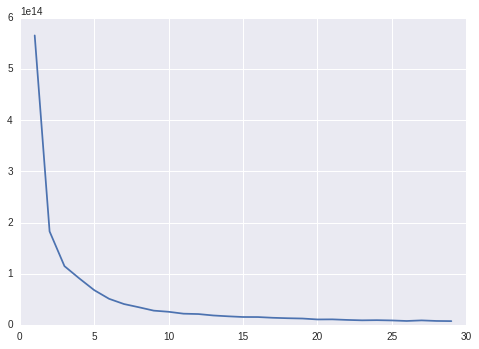

In [105]:
plt.plot(n_clusters_opt,sum_of_distance_from_centroid)

In [12]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [13]:
kmeans_new = MiniBatchKMeans(n_clusters=5)
kmeans_new.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=5,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [14]:
kmeans_new.labels_.max()

4

In [15]:
def divide_dataset(data):
    cluster_predict = kmeans_new.predict(X)
    for i in range(len(cluster_predict)):
        if cluster_predict[i]==0:
            cluster_one.append(data[i])
        elif cluster_predict[i]==1:
            cluster_two.append(data[i])
        elif cluster_predict[i]==2:
            cluster_three.append(data[i])
        elif cluster_predict[i]==3:
            cluster_four.append(data[i])
        elif cluster_predict[i]==4:
            cluster_five.append(data[i])

In [16]:
cluster_one = []
cluster_two = []
cluster_three = []
cluster_four = []
cluster_five = []
divide_dataset(X)

In [17]:
len(cluster_five),len(cluster_four),len(cluster_three),len(cluster_two),len(cluster_one)

(20994, 23789, 5961, 20744, 28512)

In [18]:
cluster_one[:10]

[array([205587,   1249,      0,      1]),
 array([194480,  45447,      0,      0]),
 array([227078,   3232,      1,      3]),
 array([202000, 104129,      0,      2]),
 array([233593,    923,      0,      1]),
 array([207717,   6620,      0,      0]),
 array([221474,   4946,      0,      2]),
 array([198034,   3156,      0,      0]),
 array([241273,   1374,      0,      0]),
 array([242870,   2617,      0,      0])]

In [19]:
labels = kmeans_new.labels_
from sklearn import metrics


MemoryError: 